# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Vanya Maurletta
- **Email:** vanyamaurletta@gmail.com
- **ID Dicoding:** vanya_maurletta_3oJX

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda dari tahun 2011-2012 berdasarkan data bulanan?
- Apakah penyewaan sepeda tinggi pada saat holiday atau weekend?
- Bagaimana pengaruh cuaca terhadap penyewaan sepeda?
- Kapan jam-jam terbaik dan terburuk dalam penyewaan sepeda?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# gathering day.csv
day_df = pd.read_csv('https://raw.githubusercontent.com/vanyamaurletta/BikeSharing/refs/heads/main/Bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# gathering hour.csv
hour_df = pd.read_csv('https://raw.githubusercontent.com/vanyamaurletta/BikeSharing/refs/heads/main/Bike-sharing-dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Seluruh nama kolom pada day.csv dan hour.csv sama
- Barisnya tentu saja berbeda karena day.csv untuk data harian dan hour.csv untuk data jam

### Assessing Data

In [ ]:
# menilai data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# menilai data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# memeriksa missing value dan duplikasi pada day_df
print(f"Jumlah Missing Value pada day_df =\n{day_df.isna().sum()}")
print(f"\nJumlah duplikasi pada day_df = {day_df.duplicated().sum()}")

Jumlah Missing Value pada day_df =
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah duplikasi pada day_df = 0


In [ ]:
# memeriksa parameter statistik dari kolom numerik pada data day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# memeriksa missing valueduplikasi data pada hour_df
print(f"Jumlah Missing Value pada hour_df =\n{hour_df.isna().sum()}")
print(f"\nJumlah duplikasi pada hour_df = {hour_df.duplicated().sum()}")

Jumlah Missing Value pada hour_df =
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah duplikasi pada hour_df = 0


In [ ]:
# memeriksa parameter statistik dari kolom numerik pada data hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak terdapat missing value, duplkasi, dan inaccurate value pada day_df dan hour_df
- Kolom dteday memiliki tipe data object, seharusnya datetime

### Cleaning Data

In [ ]:
# mengubah tipe data pada day_df
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
# mengubah tipe data pada hour_df
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Kolom dteday pada day_df dan hour_df sudah memiliki tipe yang benar, yaitu datetime

## Exploratory Data Analysis (EDA)

### Explore day_df

In [ ]:
# merangkum parameter statistik dari dataset hour_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- dari 731 hari penyewaan sepeda, minimal perharinya 22 sepeda dan maximal perharinya mencapai 8741 sepeda.
- rata-rata penyewaan sepeda adalah 450435 sepeda per hari dengan standar deviasi 1937.21 yang artinya segmentasi penyewaan sepeda cukup luas tiap harinya

In [ ]:
# mengganti nama kolom pada day_df
day_df.rename(columns={
    "yr": "year",
    "mnth": "month",
    "cnt": "counts"
}, inplace=True)

In [ ]:
# data penyewaan tiap tahun
byyear = day_df.resample(rule='Y', on='dteday').agg({
    "counts": "sum"
    })
byyear.index = byyear.index.strftime('%Y') #hanya mengambil nama tahun saja
byyear.reset_index(inplace=True)
byyear

# data penyewaan tiap bulan
bymonth = day_df.resample(rule='M', on='dteday').agg({
    "counts": "sum"
    })
bymonth.index = bymonth.index.strftime('%Y-%m') # mengambil nama tahun dan bulan
bymonth.reset_index(inplace=True)
bymonth

# output
print(byyear)
print('\n')
print(bymonth)

  dteday   counts
0   2011  1243103
1   2012  2049576


     dteday  counts
0   2011-01   38189
1   2011-02   48215
2   2011-03   64045
3   2011-04   94870
4   2011-05  135821
5   2011-06  143512
6   2011-07  141341
7   2011-08  136691
8   2011-09  127418
9   2011-10  123511
10  2011-11  102167
11  2011-12   87323
12  2012-01   96744
13  2012-02  103137
14  2012-03  164875
15  2012-04  174224
16  2012-05  195865
17  2012-06  202830
18  2012-07  203607
19  2012-08  214503
20  2012-09  218573
21  2012-10  198841
22  2012-11  152664
23  2012-12  123713


**Insight:**
- penyewaan sepeda lebih banyak di tahun 2012 dibandingkan tahun 2011
- pada tahun 2011 penyewaan sepeda terbanyak terjadi di bulan Juni dan pada tahun 2012 penyewaan sepeda terbanyak terjadi di bulan September

In [ ]:
# data penyewaan pada saat holiday
day_df.groupby(by='holiday').agg({
    'counts': ['max', 'min', 'mean', 'sum']
    })

counts                            
           max   min         mean      sum
holiday                                   
0         8714    22  4527.104225  3214244
1         7403  1000  3735.000000    78435

**Insight:**
- total penyewaan sepeda pada saat hari kerja atau weekend (tidak holiday)kurang lebih 40kalinya pada saat holiday
- minimum dan maximum penyewaan sepeda pada day_df terjadi pada saat tidak holiday

In [ ]:
# data penyewaan pada saat weekday
day_df.groupby(by='weekday').agg({
    'counts': ['max', 'min', 'mean', 'sum']
    })

counts                           
           max   min         mean     sum
weekday                                  
0         8227   605  4228.828571  444027
1         7525    22  4338.123810  455503
2         7767   683  4510.663462  469109
3         8173   441  4548.538462  473048
4         7804   431  4667.259615  485395
5         8362  1167  4690.288462  487790
6         8714   627  4550.542857  477807

**Insight:**
- rata-rata penyewaan sepeda paling tinggi terjadi pada hari ke5 weekday (hari Jumat), kemudian hari ke4 weekday (hari Kamis), dan hari ke6 weekday (hari Sabtu)

In [ ]:
# data penyewaan pada saat workingday
day_df.groupby(by='workingday').agg({
    'counts': ['max', 'min', 'mean', 'sum']
    })

counts                           
              max  min         mean      sum
workingday                                  
0            8714  605  4330.168831  1000269
1            8362   22  4584.820000  2292410

**Insight:**
- penyewaan sepeda pada workingday jauh lebih tinggi dibandingkan pada saat tidak working day

In [ ]:
# memetakan penyewaan sepeda pada workingday, holiday, dan weekend
day_df.groupby(by=['workingday','holiday','weekday']).agg({
    'counts':'sum'
    })

counts
workingday holiday weekday        
0          0       0        444027
                   6        477807
           1       1         59605
                   2          1013
                   3          7403
                   4          3920
                   5          6494
1          0       1        395898
                   2        468096
                   3        465645
                   4        481475
                   5        481296

**Insight:**
- urutan total penyewaan sepeda dari yang terbanyak sampai yang terendah adalah workingday-weekend-holiday.

In [ ]:
# penyewaan sepeda pada kondisi cuaca tertentu
day_df.groupby(by='weathersit').agg({
    'casual':'mean',
    'registered':'mean',
    'counts' : 'mean',
    }).sort_values(by=('counts'), ascending=True)

,casual,registered,counts
weathersit,,,
3,185.476190,1617.809524,1803.285714
2,687.352227,3348.510121,4035.862348
1,964.030238,3912.755940,4876.786177


**Insight:**
- Ketika weathersit adalah 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) maka rata-rata penyewa sepeda baik itu casual maupun registered jauh lebih kecil dibandingkan ketika kondisi cuaca lainnya.

### Explore hour_df

In [ ]:
# merangkum parameter statistik dari dataset hour_df
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [ ]:
# mengganti nama kolom pada hour_df
hour_df.rename(columns={
    "yr": "year",
    "mnth": "month",
    "hr" : "hour",
    "cnt": "counts"
}, inplace=True)

In [ ]:
# jumlah penyewaan sepeda untuk tiap jamnya
hour_df.groupby(by='hour').agg({
    'counts': 'mean'
    }).sort_values(by=('counts'), ascending=False) # diurutkan dari jumlah yang tertinggi

,counts
hour,
17,461.452055
18,425.510989
8,359.011004
16,311.983562
19,311.523352
13,253.661180
12,253.315934
15,251.233196
14,240.949246


**Insight:**
- rata-rata penyewaan sepeda biasanya tinggi di jam 17.00 dan 18.00, yang adalah jam pulang kerja. Diikuti dengan jam 08.00 yang adalah jam masuk kerja
- rata-rata penyewaan sepeda terendah terjadi di jam 04.00 dan 03.00

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda dari tahun 2011-2012 berdasarkan data bulanan?

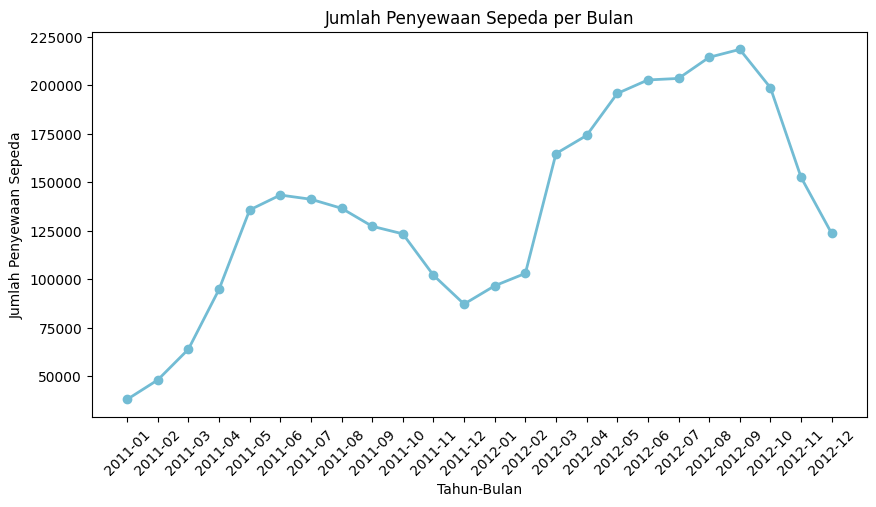

In [ ]:
# jumlah penyewaan sepeda untuk tiap bulannya
month_df = day_df.resample(rule='M', on='dteday').agg({
    "counts": "sum"
    })
month_df.index = month_df.index.strftime('%Y-%m') # menanpilkan angka tahun dan bulannya
month_df.reset_index(inplace=True)

# visualisasi grafik
plt.figure(figsize=(10, 5))
plt.plot(month_df['dteday'], month_df['counts'], marker='o', linewidth=2, color="#72BCD4")
plt.title('Jumlah Penyewaan Sepeda per Bulan')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- pada tahun 2011 penyewaan sepeda mengalami kenaikan dari awal tahun sampai bulan Juni, namuns etelah itu mengalami penurunan sampai akhir tahun
- pada tahun 2012 penyewaan sepeda mengalami kenaikan dari awal tahun sampai bulan September, namun setelah itu mengalami penurunan sampai akhir tahun

### Pertanyaan 2: Apakah penyewaan sepeda tinggi pada saat holiday atau weekend?


<Axes: xlabel='workingday', ylabel='counts'>

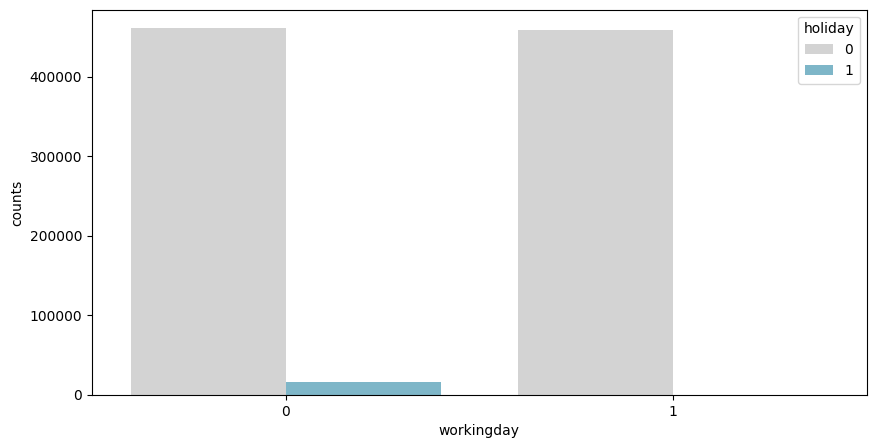

In [ ]:
# jumlah penyewaan sepeda pada working day, holiday, dan weekend
working_holiday_weekend = day_df.groupby(by=['workingday','holiday','weekday']).agg({
    'counts':'sum'
    })

# visualisasi grafik
plt.figure(figsize=(10, 5))
sns.barplot(data=working_holiday_weekend,
            x="workingday",
            y="counts",
            hue="holiday",
            palette=["#D3D3D3", "#72BCD4"],
            errorbar=None)

**Insight:**
- Grafik ini menampilkan jumlah penyewaan sepeda pada weekend dan workingday yang sangat tinggi
- Grafik ini juga menampilkan bahwa jumlah penyewaan sepeda pada holiday sangat kecil dibandingkan weekend dan workingday

### Pertanyaan 3: Bagaimana pengaruh cuaca terhadap penyewaan sepeda?

<ipython-input-52-48454ae38fc5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit',


<Axes: xlabel='weathersit', ylabel='counts'>

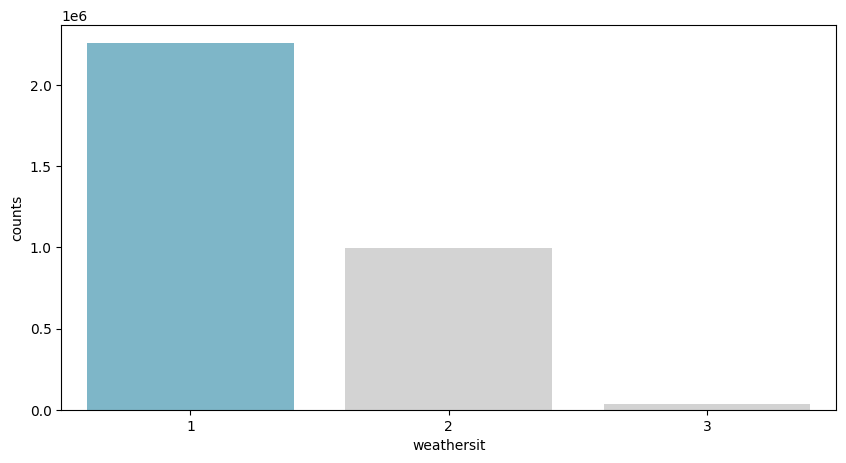

In [ ]:
# jumlah penyewaan sepeda pada kondisi cuaca tertentu
weather_condition_df = day_df.groupby(by='weathersit').agg({
                          'counts' : 'sum',
                          })

# visualisasi grafik
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3"]
sns.barplot(x='weathersit',
            y='counts',
            data=weather_condition_df,
            palette=colors)

**Insight:**
- Jumlah penyewaan sepeda pada kondisi cuaca nomor1 (cerah) lebih tinggi dibandingkna jumlah penyewaan sepeda pada kondisi cuaca nomor2 (berkabut/berawan) dan kondisi cuaca nomor3 (sedikit hujan/petir/bersalju)

### Pertanyaan 4: Kapan jam-jam terbaik dan terburuk dalam penyewaan sepeda?


<ipython-input-55-e7f37bacfdca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="counts", data=hour_bike_sharing_df.sort_values(by="counts", ascending=False).head(5), palette=colors1, ax=ax[0])  # mengambil 5 jam-jam terbaik
<ipython-input-55-e7f37bacfdca>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="counts", data=hour_bike_sharing_df.sort_values(by="counts", ascending=True).head(5), palette=colors2, ax=ax[1]) # mengambil 5 jam-jam terburuk


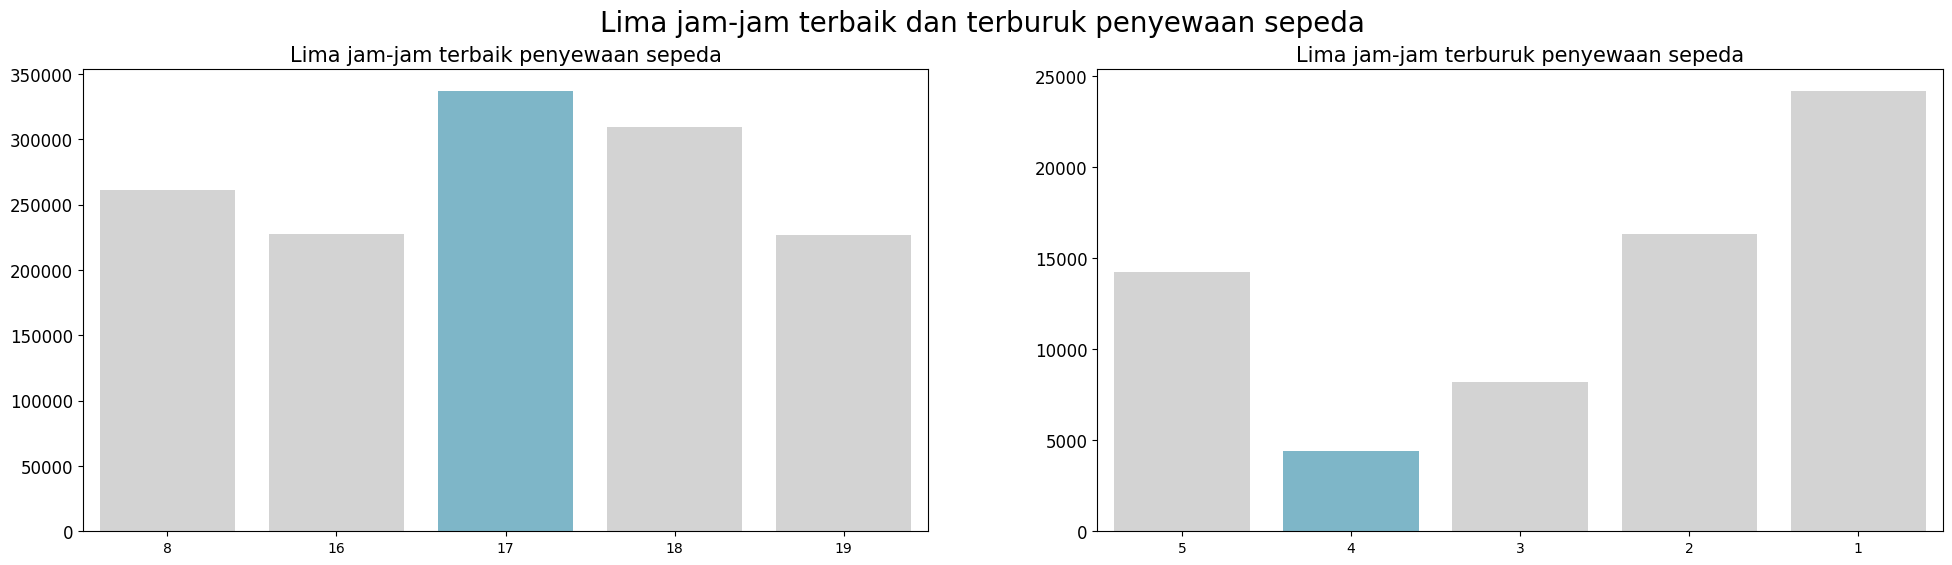

In [ ]:
# jumlah penyewaan sepeda tiap jamnya
hour_bike_sharing_df = hour_df.groupby('hour').counts.sum().sort_values(ascending=False).reset_index()

# visualisasi grafik
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# visualisasi grafik jam-jam terbaik
colors1 = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="hour", y="counts", data=hour_bike_sharing_df.sort_values(by="counts", ascending=False).head(5), palette=colors1, ax=ax[0])  # mengambil 5 jam-jam terbaik
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Lima jam-jam terbaik penyewaan sepeda", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

# visualisasi grafik jam-jam terburuk
colors2 = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]
sns.barplot(x="hour", y="counts", data=hour_bike_sharing_df.sort_values(by="counts", ascending=True).head(5), palette=colors2, ax=ax[1]) # mengambil 5 jam-jam terburuk
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].set_title("Lima jam-jam terburuk penyewaan sepeda", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Lima jam-jam terbaik dan terburuk penyewaan sepeda", fontsize=20)
plt.show()

**Insight:**
- Pada jam-jam terbaik, penyewaan sepeda melebihi 200ribu. urutan jam-jam terbaik adalah dari yang paling tinggi ke yang paling rendah 17.00 - 18.00 - 08.00 - 19.00 - 16.00
- Pada jam-jam terbaik, penyewaan sepeda tidak menyentuh angka 25. urutan jam-jam terbaik dari yang paling rendah ke yang paling tinggi adalah 04.00 - 03.00 - 05.00 - 02.00 - 01.00

## Analisis Lanjutan (Opsional)

In [58]:
clustering_df = day_df.groupby(by=['workingday','holiday','weekday']).agg({
                    'counts':'sum'})
clustering_df

counts
workingday holiday weekday        
0          0       0        444027
                   6        477807
           1       1         59605
                   2          1013
                   3          7403
                   4          3920
                   5          6494
1          0       1        395898
                   2        468096
                   3        465645
                   4        481475
                   5        481296

Pertama, jumlah penyewaan sepeda dibagi ke dalam workingday (1) dan no working day (0)

Lalu, jumlah penyewaan sepeda dibagi ke dalam holiday (1) dan no holiday (0)

Pada no working day (0), terdapat pengelompakan data jumlah peenyewaan sepeda. Pada non holiday (0), terdapat data penyewaan sepeda weekend (weekday0 dan weekday6). Pada holiday (1) terdapat data penyewaan sepeda pada liburan saat hari kerja (weekday1-5)

Pada working day, terdapat data jumlah penyewaan sepeeda adalah dari weekday1-weekday5

Dari clustering ini dapat dilihat bahwa data jumlah penyewaan sepeda pada workingday-noholiday-weekday(hari kerja senin-jumat) dan noworkingday-noholiday-weekday(weekend hari sabut-minggu) jauh lebih tinggi dibandingkan data jumlah penyewaan sepeda pada noworkingday-holiday-weekday(liburan yang jatuh pada hari senin-juamt)

## Conclusion

**- Conclusion pertanyaan 1:**

Penyewaan sepeda pada awal tahun biasanya mengalami peningkatan sedangkan pada akhir tahun mengalami penurunan. Perusahaan penyewaan sepeda dapat meningkatkan promosi penyewaan sepeda ataupun campaign penggunaan sepeda pada pertengahan tahun sampai akhir tahun sehingga performa penyewaan sepeda terus baik/tinggi sepanjang tahun. Jika hal ini dilakukan, maka perusahaan penyewaan sepeda dapat memiliki pendapatan yang semakin tinggi akibat dari performa penyewaan sepedanya yang baik sepanjang tahun

**- Conclution pertanyaan 2:**

Penyewaan sepeda pada weekday dan weekend ternyata jauh lebih tinggi dibandingkan pada saat holiday. Penyewaan sepeda pada saat holiday sangat kecil padahal saat holiday seharusnya dapat meningkatkan jumlah penyewaan sepeda sehingga pendapatan perusahaan meningkat. Perusahaan dapat membuat promosi atau aktivitas menarik dengan menggunakan sepeda sehingga pada saat holiday, orang-orang juga tertarik untuk menyewa sepeda.

**- Conclution pertanyaan 3:**

Pada saat cuaca cerah, orang-orang cenderung untuk menyewa sepeda dibandingkan pada saat mendung ataupun hujan. Hal ini wajar karena bersepeda pada saat cuaca mendung ataupun hujan dapat beresiko pesepeda kejuhanan ataupun tersambar petir. Perusahaan dapat menurunkan kuota penyewaan sepeda pada saat cuaca mendung atau hujan dan meningkatkan kuota penyewaan sepeda pada saat cuaca cerah. Hal ini agar pada saat cuaca cerah orang-orang dapat menyewa sepeda dan semakin meningkatkna pendapatan perusahaan penyewa sepeda.

**- Conclution pertanyaan 4:**

Jumlah penyewaan sepeda paling tinggi pada 5sore,6sore,7malam,8pagi,dan 4sore. Dapat kita asumsikan bahwa jam-jam ini adalah jam-jam pulang kerja dan jam masuk kerja. Artinya biasanya orang-orang menyewa sepeda pada jam pulang kerja dan jam masuk kerja. Perusahaan dapat meningkatkan kuota penyewaan sepeda di jam masuk/pulang kerja  dan menambah lokasi penyewaan sepeda di daerah permukiman atau perkantoran. Hal ini agar orang-orang dapat mudah mengakses penyewaan sepeda sehingga performa penyewaan sepeda dan pendapatan perusahaan semakin meningkat. Jumlah penyewaan sepeda paling rendah terjadi pada jam-jam subuh yaitu pada 4pagi,3pagi,5pagi,2pagi,dan 1pagi. Hal ini wajar karena biasanya tidak ada aktifitas dan jam ini juga merupakan jam tidur orang-orang. Perusahaan dapat mengurangi jumlah kuota penyewaan sepeda pada jam-jam seperti ini.

Tambahan untuk menyimpan day_df dan hour_df ke dalam csv untuk pembuatan streamlit

In [ ]:
 day_df.to_csv("days.csv", index=False)
 hour_df.to_csv("hours.csv", index=False)